#############################################################
      ARTIFICIAL NEURAL NETWORKS(Using MLP Classifier)       
#############################################################

---------------------------------------------
 (i)For MLP classifier with 0 hidden layers  
---------------------------------------------
|   Index |   Learning Rate |   Test Accuracy |   No of Iterations |
|---------+-----------------+-----------------+--------------------|
|       1 |          1e-05  |           57.87 |                 12 |
|       2 |          0.0001 |           57.87 |                 12 |
|       3 |          0.001  |           58.09 |                 33 |
|       4 |          0.01   |           81.54 |                918 |
|       5 |          0.1    |           88.49 |                616 |

++++ Best Test accuracy is observed for, Learning rate = 0.1 with the Test accuracy = 88.49


-------------------------------------------------------
 (ii) For MLP classifier, 1 hidden layer 

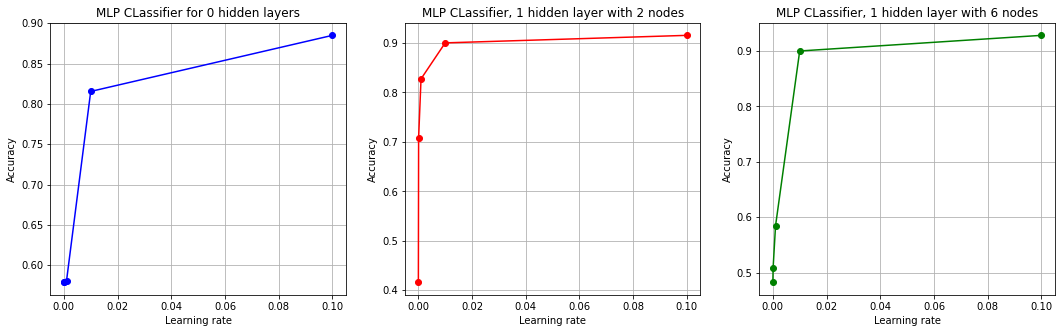

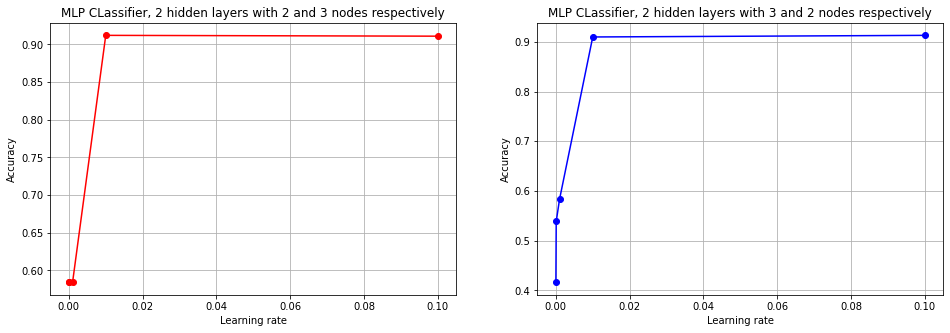



-------------------------------------------------------------------
            Model vs Accuracy Graphs for each learning rate        
-------------------------------------------------------------------


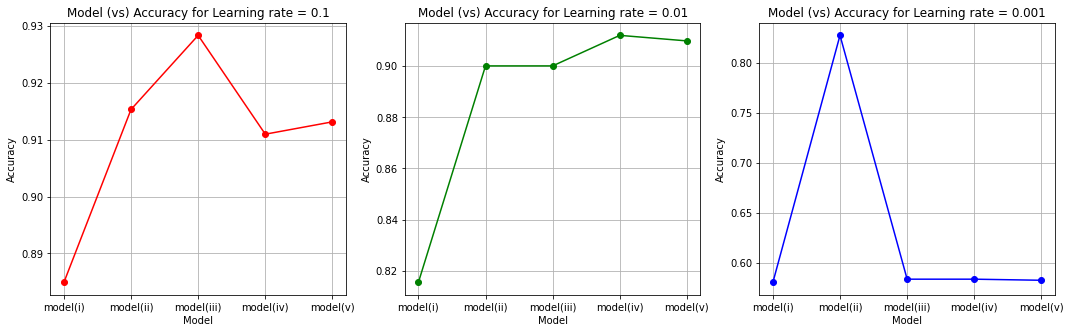

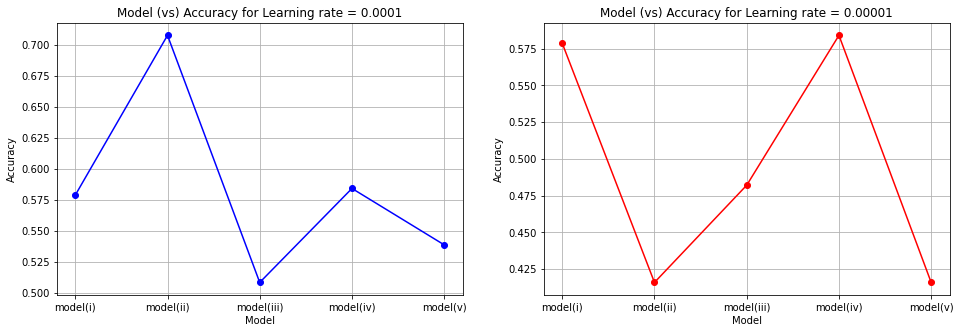

---------------------------------------
         Best MLP Model observed       
---------------------------------------

++++ MLP CLassifier, 1 hidden layer with 6 nodes

=> Number of nodes in the input layer = 57

=> Number of nodes in the output layer = 1

=> For Learning Rate = 0.1

=> With Test Accuracy = 92.83

=> Loss Computed = 0.1889200467702065

=> Number of Iterations = 551

=> Batch Size = 1500 

=> Number of Epochs = 224.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import math


def plot_graph(lr, acc, title, x_label, color):
  str_clr = color+'o-'
  plt.plot(lr,acc,str_clr)
  plt.ylabel('Accuracy')
  plt.xlabel(x_label)
  plt.title(title)
  plt.grid()


def main():
  column_names = ["word_freq_make", "word_freq_address" ,"word_freq_all","word_freq_3d","word_freq_our","word_freq_over" ,"word_freq_remove", "word_freq_internet",
                  "word_freq_order" ,"word_freq_mail" ,"word_freq_receive" ,"word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free",
                  "word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
                  "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
                  "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct" ,"word_freq_cs","word_freq_meeting" ,"word_freq_original" ,"word_freq_project",
                  "word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(" ,"char_freq_[ " ,"char_freq_!", "char_freq_$", "char_freq_#" ,
                  "capital_run_length_average","capital_run_length_longest","capital_run_length_total","spam"]
                  
  df = pd.read_csv("/content/sample_data/spambase.data",sep=",", names=column_names)
  y = df['spam']
  X = df.drop('spam', axis=1)
 
  scaler = MinMaxScaler()
  X = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  print("#############################################################")
  print("      ARTIFICIAL NEURAL NETWORKS(Using MLP Classifier)       ")
  print("#############################################################")

  best_test_acc = []
  train_size = len(X_train);
  #print(train_size)
  print()

  print("---------------------------------------------")
  print(" (i)For MLP classifier with 0 hidden layers  ")
  print("---------------------------------------------")
  mlp1_lr = [] 
  mlp1_train = []
  mlp1_test = []
  mlp1_bunch = []
  for i in range(5):
        mlp_hid_0 = MLPClassifier(hidden_layer_sizes = (),
                                  solver = 'sgd', 
                                  learning_rate_init = (0.00001) * np.power(10, i),
                                  learning_rate = 'constant',
                                  random_state = 1,
                                  batch_size = 1500,
                                  max_iter = 20000,
                                  activation = 'tanh'
                                  )
        mlp_hid_0.fit(X_train, y_train)
        mlp1_lr.append(((0.00001) * np.power(10, i)))
        mlp1_train.append(mlp_hid_0.score(X_train, y_train))
        mlp1_test.append(mlp_hid_0.score(X_test, y_test))
        mlp1_bunch.append([str(i+1), str(mlp1_lr[i]),str(round(mlp1_test[i]*100, 2)), str(mlp_hid_0.n_iter_)])
  print(tabulate(mlp1_bunch, headers = ["Index", "Learning Rate", "Test Accuracy", "No of Iterations"], tablefmt='orgtbl'))

  max_ind1 = mlp1_test.index(max(mlp1_test))
  print("\n++++ Best Test accuracy is observed for, Learning rate = "+str(mlp1_lr[max_ind1])+" with the Test accuracy = "+str(round(mlp1_test[max_ind1]*100, 2)))
  best_test_acc.append([1, mlp1_lr[max_ind1], mlp1_test[max_ind1], mlp_hid_0,'MLP CLassifier for 0 hidden layers'])
  print()
  print()
 
  print("-------------------------------------------------------")
  print(" (ii) For MLP classifier, 1 hidden layer with 2 nodes  ")
  print("-------------------------------------------------------")
  mlp2_lr = []
  mlp2_train = []
  mlp2_test = []
  mlp2_bunch = []
  for i in range(5):
        mlp2 = MLPClassifier(hidden_layer_sizes = (2),
                                  solver = 'sgd', 
                                  learning_rate_init = (0.00001) * np.power(10, i),
                                  learning_rate = 'constant',
                                  random_state = 1,
                                  batch_size = 1500,
                                  max_iter = 20000,
                                  activation = 'tanh'
                                  )
        mlp2.fit(X_train, y_train)
        mlp2_lr.append(((0.00001) * np.power(10, i)))
        mlp2_train.append(mlp2.score(X_train, y_train))
        mlp2_test.append(mlp2.score(X_test, y_test))
        mlp2_bunch.append([str(i+1), str(mlp2_lr[i]),str(round(mlp2_test[i]*100, 2)), str(mlp2.n_iter_)])
  print(tabulate(mlp2_bunch, headers = ["Index", "Learning Rate", "Test Accuracy", "No of Iterations"], tablefmt='orgtbl'))

  max_ind2 = mlp2_test.index(max(mlp2_test))
  print("\n++++ Best Test accuracy is observed for, Learning rate = "+str(mlp2_lr[max_ind2])+" with the Test accuracy = "+str(round(mlp2_test[max_ind2]*100, 2)))
  best_test_acc.append([2, mlp2_lr[max_ind2], mlp2_test[max_ind2], mlp2, 'MLP CLassifier, 1 hidden layer with 2 nodes'])
  # plot_graph(mlp2_lr, mlp2_test,'MLP CLassifier, 1 hidden layer with 2 nodes','Learning rate','r')
  # plt.show()
  print()
  print()

  print("---------------------------------------------------------")
  print("  (iii)For MLP classifier, 1 hidden layer with 6 nodes   ")
  print("---------------------------------------------------------")
  mlp3_lr = []
  mlp3_train = []
  mlp3_test = []
  mlp3_bunch = []
  for i in range(5):
        mlp3 = MLPClassifier(hidden_layer_sizes = (6),
                                  solver = 'sgd', 
                                  learning_rate_init = (0.00001) * np.power(10, i),
                                  learning_rate = 'constant',
                                  random_state = 1,
                                  batch_size = 1500,
                                  max_iter = 20000,
                                  activation = 'tanh'
                                  )
        mlp3.fit(X_train, y_train)
        mlp3_lr.append(((0.00001) * np.power(10, i)))
        mlp3_train.append(mlp3.score(X_train, y_train))
        mlp3_test.append(mlp3.score(X_test, y_test))
        mlp3_bunch.append([str(i+1), str(mlp3_lr[i]),str(round(mlp3_test[i]*100, 2)), str(mlp3.n_iter_)])
  print(tabulate(mlp3_bunch, headers = ["Index", "Learning Rate", "Test Accuracy", "No of Iterations"], tablefmt='orgtbl'))

  max_ind3 = mlp3_test.index(max(mlp3_test))
  print("\n++++ Best Test accuracy is observed for, Learning rate = "+str(mlp3_lr[max_ind3])+" with the Test accuracy = "+str(round(mlp3_test[max_ind3]*100, 2)))
  best_test_acc.append([3, mlp3_lr[max_ind3], mlp3_test[max_ind3], mlp3, 'MLP CLassifier, 1 hidden layer with 6 nodes'])
  # plot_graph(mlp3_lr, mlp3_test,'MLP CLassifier, 1 hidden layer with 6 nodes','Learning rate','g')
  # plt.show()
  print()
  print()
 
  print("-------------------------------------------------------------------------")
  print(" (iv)For MLP classifier, 2 hidden layers with 2 and 3 nodes respectively ")
  print("-------------------------------------------------------------------------")
  mlp4_lr = []
  mlp4_train = []
  mlp4_test = []
  mlp4_bunch = []
  for i in range(5):
        mlp4 = MLPClassifier(hidden_layer_sizes = (2,3),
                                  solver = 'sgd', 
                                  learning_rate_init = (0.00001) * np.power(10, i),
                                  learning_rate = 'constant',
                                  random_state = 1,
                                  batch_size = 1500,
                                  max_iter = 20000,
                                  activation ='tanh'
                                  )
        mlp4.fit(X_train, y_train)
        mlp4_lr.append(((0.00001) * np.power(10, i)))
        mlp4_train.append(mlp4.score(X_train, y_train))
        mlp4_test.append(mlp4.score(X_test, y_test))
        mlp4_bunch.append([str(i+1), str(mlp4_lr[i]),str(round(mlp4_test[i]*100, 2)), str(mlp4.n_iter_)])
  print(tabulate(mlp4_bunch, headers = ["Index", "Learning Rate", "Test Accuracy", "No of Iterations"], tablefmt='orgtbl'))

  max_ind4 = mlp4_test.index(max(mlp4_test))
  print("\n++++ Best Test accuracy is observed for, Learning rate = "+str(mlp4_lr[max_ind4])+" with the Test accuracy = "+str(round(mlp4_test[max_ind4]*100, 2)))
  best_test_acc.append([4, mlp4_lr[max_ind4], mlp4_test[max_ind4], mlp4, 'MLP CLassifier, 2 hidden layers with 2 and 3 nodes respectively'])
  # plot_graph(mlp4_lr, mlp4_test,'MLP CLassifier, 2 hidden layers with 2 and 3 nodes respectively','Learning rate','r')
  # plt.show()
  print()
  print()

  print("------------------------------------------------------------------------")
  print(" (v)For MLP classifier, 2 hidden layers with 3 and 2 nodes respectively ")
  print("------------------------------------------------------------------------")
  mlp5_lr = []
  mlp5_train = []
  mlp5_test = []
  mlp5_bunch = []
  for i in range(5):
        mlp5 = MLPClassifier(hidden_layer_sizes = (3,2),
                                  solver = 'sgd', 
                                  learning_rate_init = (0.00001) * np.power(10, i),
                                  learning_rate = 'constant',
                                  random_state = 1,
                                  batch_size = 1500,
                                  max_iter = 20000,
                                  activation = 'tanh'
                                  )
        mlp5.fit(X_train, y_train)
        mlp5_lr.append(((0.00001) * np.power(10, i)))
        mlp5_train.append(mlp5.score(X_train, y_train))
        mlp5_test.append(mlp5.score(X_test, y_test))
        mlp5_bunch.append([str(i+1), str(mlp5_lr[i]),str(round(mlp5_test[i]*100, 2)), str(mlp5.n_iter_)])
  print(tabulate(mlp5_bunch, headers = ["Index", "Learning Rate", "Test Accuracy", "No of Iterations"], tablefmt='orgtbl'))

  max_ind5 = mlp5_test.index(max(mlp5_test))
  print("\n++++ Best Test accuracy is observed for, Learning rate = "+str(mlp5_lr[max_ind5])+" with the Test accuracy = "+str(round(mlp5_test[max_ind5]*100, 2)))
  best_test_acc.append([5, mlp5_lr[max_ind5], mlp5_test[max_ind5], mlp5, 'MLP CLassifier, 2 hidden layers with 3 and 2 nodes respectively'])
  # plot_graph(mlp5_lr, mlp5_test,'MLP CLassifier, 2 hidden layers with 3 and 2 nodes respectively','Learning rate','b')
  # plt.show()

  #print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  models = ["model(i)","model(ii)", "model(iii)", "model(iv)", "model(v)"]

  lr0_1_acc = []
  lr0_1_acc.append(mlp1_test[4])
  lr0_1_acc.append(mlp2_test[4])
  lr0_1_acc.append(mlp3_test[4])
  lr0_1_acc.append(mlp4_test[4])
  lr0_1_acc.append(mlp5_test[4])

  lr0_01_acc = []
  lr0_01_acc.append(mlp1_test[3])
  lr0_01_acc.append(mlp2_test[3])
  lr0_01_acc.append(mlp3_test[3])
  lr0_01_acc.append(mlp4_test[3])
  lr0_01_acc.append(mlp5_test[3])

  lr0_001_acc = []
  lr0_001_acc.append(mlp1_test[2])
  lr0_001_acc.append(mlp2_test[2])
  lr0_001_acc.append(mlp3_test[2])
  lr0_001_acc.append(mlp4_test[2])
  lr0_001_acc.append(mlp5_test[2])

  lr0_0001_acc = []
  lr0_0001_acc.append(mlp1_test[1])
  lr0_0001_acc.append(mlp2_test[1])
  lr0_0001_acc.append(mlp3_test[1])
  lr0_0001_acc.append(mlp4_test[1])
  lr0_0001_acc.append(mlp5_test[1])

  lr0_00001_acc = []
  lr0_00001_acc.append(mlp1_test[0])
  lr0_00001_acc.append(mlp2_test[0])
  lr0_00001_acc.append(mlp3_test[0])
  lr0_00001_acc.append(mlp4_test[0])
  lr0_00001_acc.append(mlp5_test[0])
  
  print("\n")
  print("--------------------------------------------------------------")
  print("       Learning rate vs Accuracy Graphs for each model        ")
  print("--------------------------------------------------------------")
  plt.figure(figsize = (18,5))
  plt.subplot(1,3,1)
  plot_graph(mlp1_lr, mlp1_test,'MLP CLassifier for 0 hidden layers','Learning rate','b')
  plt.subplot(1,3,2)
  plot_graph(mlp2_lr, mlp2_test,'MLP CLassifier, 1 hidden layer with 2 nodes','Learning rate','r')
  plt.subplot(1,3,3)
  plot_graph(mlp3_lr, mlp3_test,'MLP CLassifier, 1 hidden layer with 6 nodes','Learning rate','g')
  plt.show()
  plt.figure(figsize = (16,5))
  plt.subplot(1,2,1)
  plot_graph(mlp4_lr, mlp4_test,'MLP CLassifier, 2 hidden layers with 2 and 3 nodes respectively','Learning rate','r')
  plt.subplot(1,2,2)
  plot_graph(mlp5_lr, mlp5_test,'MLP CLassifier, 2 hidden layers with 3 and 2 nodes respectively','Learning rate','b')
  plt.show()

  print("\n")
  print("-------------------------------------------------------------------")
  print("            Model vs Accuracy Graphs for each learning rate        ")
  print("-------------------------------------------------------------------")
  plt.figure(figsize = (18,5))
  plt.subplot(1,3,1)
  plot_graph(models, lr0_1_acc, 'Model (vs) Accuracy for Learning rate = 0.1','Model', 'r')
  plt.subplot(1,3,2)
  plot_graph(models, lr0_01_acc, 'Model (vs) Accuracy for Learning rate = 0.01','Model', 'g')
  plt.subplot(1,3,3)
  plot_graph(models, lr0_001_acc, 'Model (vs) Accuracy for Learning rate = 0.001','Model', 'b')
  plt.show()
  plt.figure(figsize = (16,5))
  plt.subplot(1,2,1)
  plot_graph(models, lr0_0001_acc, 'Model (vs) Accuracy for Learning rate = 0.0001','Model', 'b')
  plt.subplot(1,2,2)
  plot_graph(models, lr0_00001_acc, 'Model (vs) Accuracy for Learning rate = 0.00001','Model', 'r')  
  plt.show()

  best_test_acc = np.array(best_test_acc)
  best_model = best_test_acc[np.where(best_test_acc == np.max(best_test_acc[:, 2]))[0]].copy()
  print("---------------------------------------")
  print("         Best MLP Model observed       ")
  print("---------------------------------------")
  print("\n++++ "+best_model[0][4])
  print("\n=> Number of nodes in the input layer = "+str(len(column_names)-1))
  print("\n=> Number of nodes in the output layer = "+str(best_model[0][3].n_outputs_))
  print("\n=> For Learning Rate = "+str(best_model[0][1]))
  print("\n=> With Test Accuracy = "+str(round(best_model[0][2]*100 ,2)))
  print("\n=> Loss Computed = "+str(best_model[0][3].loss_))
  print("\n=> Number of Iterations = "+str(best_model[0][3].n_iter_))
  print("\n=> Batch Size = 1500 ")
  iter_per_epoch = train_size/1500
  num_epochs = np.floor(best_model[0][3].n_iter_ / iter_per_epoch)
  print("\n=> Number of Epochs = "+str(num_epochs))

if __name__ == "__main__":
    main()